# **Annotation**

> #### การ Highlight เฉพาะข้อมูลที่เราต้องการจะสื่อกับผู้อ่าน

> #### สามารถใช้ฟังก์ชั่น **Ifelse** เพื่อเปลี่ยน Size, Color, Alpha 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see http://bit.ly/arialnarrow

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, a

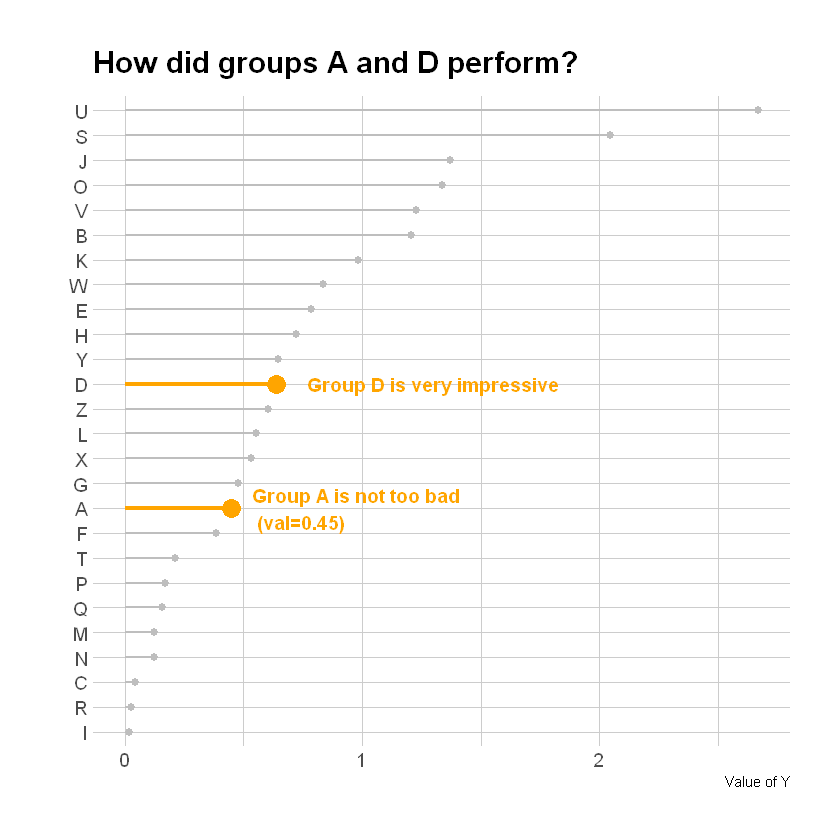

In [3]:
# Library
library(ggplot2)
library(dplyr)
library(hrbrthemes)

# Create data
set.seed(1000)
data <- data.frame(
  x=LETTERS[1:26], 
  y=abs(rnorm(26))
)
 
# Reorder the data
data <- data %>%
  arrange(y) %>%
  mutate(x=factor(x,x))
  
# Plot
p <- ggplot(data, aes(x=x, y=y)) +
  geom_segment( aes(x=x, xend=x, y=0, yend=y ), color=ifelse(data$x %in% c("A","D"), "orange", "grey"), size=ifelse(data$x %in% c("A","D"), 1.3, 0.7) ) +
  geom_point( color=ifelse(data$x %in% c("A","D"), "orange", "grey"), size=ifelse(data$x %in% c("A","D"), 5, 2) ) +
  theme_ipsum() +
  coord_flip() +
  theme(
    legend.position="none"
  ) +
  xlab("") +
  ylab("Value of Y") +
  ggtitle("How did groups A and D perform?")

# Add annotation
p + annotate("text", x=grep("D", data$x), y=data$y[which(data$x=="D")]*1.2, 
           label="Group D is very impressive", 
           color="orange", size=4 , angle=0, fontface="bold", hjust=0) + 
  
    annotate("text", x = grep("A", data$x), y = data$y[which(data$x=="A")]*1.2, 
           label = paste("Group A is not too bad\n (val=",data$y[which(data$x=="A")] %>% round(2),")",sep="" ) , 
           color="orange", size=4 , angle=0, fontface="bold", hjust=0) 